In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
train = pd.read_csv('data/train.csv')

In [957]:
train.describe()


,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Mix,BreedGroup
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366,2,19
top,A693923,Max,2015-08-11 0:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White,Mix,Domestic
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824,25338,10388


In [4]:
group = train.groupby(['OutcomeType','Breed'])
group.size().sort_values(ascending = False)

OutcomeType      Breed                                    
Transfer         Domestic Shorthair Mix                       4538
Adoption         Domestic Shorthair Mix                       3273
                 Chihuahua Shorthair Mix                       767
Return_to_owner  Pit Bull Mix                                  598
Adoption         Labrador Retriever Mix                        590
                 Pit Bull Mix                                  568
Euthanasia       Domestic Shorthair Mix                        535
Transfer         Chihuahua Shorthair Mix                       501
                 Pit Bull Mix                                  478
Return_to_owner  Chihuahua Shorthair Mix                       407
Transfer         Domestic Medium Hair Mix                      383
Return_to_owner  Labrador Retriever Mix                        369
Adoption         Domestic Medium Hair Mix                      357
Return_to_owner  Domestic Shorthair Mix                        352
Tra

In [6]:
## Animal Type = Dog 인것중에 개 Breed 로 나눠 인덱싱, 총 15595 rows 
feature = 'Breed'

feature_values_dog = train.loc[train['AnimalType'] == 'Dog',feature]

feature_values_dog 

0                        Shetland Sheepdog Mix
2                                 Pit Bull Mix
4                  Lhasa Apso/Miniature Poodle
5            Cairn Terrier/Chihuahua Shorthair
8                American Pit Bull Terrier Mix
9                                Cairn Terrier
11                     Miniature Schnauzer Mix
12                                Pit Bull Mix
13                       Yorkshire Terrier Mix
14                          Great Pyrenees Mix
17                                Pit Bull Mix
19                     Flat Coat Retriever Mix
20                       Queensland Heeler Mix
22                           Plott Hound/Boxer
23                         German Shepherd Mix
24                         German Shepherd Mix
26          American Staffordshire Terrier Mix
27                     Chihuahua Shorthair Mix
31                      Labrador Retriever Mix
33               Collie Smooth/German Shepherd
34                     Chihuahua Shorthair Mix
35           

In [110]:
## 206 가지의 개분류를 7type의 group으로 매치 ## 총 206가지 
breeds = ['Blue Lacy','Queensland Heeler','Rhod Ridgeback','Retriever','Chinese Sharpei','Black Mouth Cur','Catahoula','Staffordshire','Affenpinscher','Afghan Hound','Airedale Terrier','Akita','Australian Kelpie','Alaskan Malamute','English Bulldog','American Bulldog','American English Coonhound','American Eskimo Dog (Miniature)','American Eskimo Dog (Standard)','American Eskimo Dog (Toy)','American Foxhound','American Hairless Terrier','American Staffordshire Terrier','American Water Spaniel','Anatolian Shepherd Dog','Australian Cattle Dog','Australian Shepherd','Australian Terrier','Basenji','Basset Hound','Beagle','Bearded Collie','Beauceron','Bedlington Terrier','Belgian Malinois','Belgian Sheepdog','Belgian Tervuren','Bergamasco','Berger Picard','Bernese Mountain Dog','Bichon Fris_','Black and Tan Coonhound','Black Russian Terrier','Bloodhound','Bluetick Coonhound','Boerboel','Border Collie','Border Terrier','Borzoi','Boston Terrier','Bouvier des Flandres','Boxer','Boykin Spaniel','Briard','Brittany','Brussels Griffon','Bull Terrier','Bull Terrier (Miniature)','Bulldog','Bullmastiff','Cairn Terrier','Canaan Dog','Cane Corso','Cardigan Welsh Corgi','Cavalier King Charles Spaniel','Cesky Terrier','Chesapeake Bay Retriever','Chihuahua','Chinese Crested Dog','Chinese Shar Pei','Chinook','Chow Chow',"Cirneco dell'Etna",'Clumber Spaniel','Cocker Spaniel','Collie','Coton de Tulear','Curly-Coated Retriever','Dachshund','Dalmatian','Dandie Dinmont Terrier','Doberman Pinsch','Doberman Pinscher','Dogue De Bordeaux','English Cocker Spaniel','English Foxhound','English Setter','English Springer Spaniel','English Toy Spaniel','Entlebucher Mountain Dog','Field Spaniel','Finnish Lapphund','Finnish Spitz','Flat-Coated Retriever','French Bulldog','German Pinscher','German Shepherd','German Shorthaired Pointer','German Wirehaired Pointer','Giant Schnauzer','Glen of Imaal Terrier','Golden Retriever','Gordon Setter','Great Dane','Great Pyrenees','Greater Swiss Mountain Dog','Greyhound','Harrier','Havanese','Ibizan Hound','Icelandic Sheepdog','Irish Red and White Setter','Irish Setter','Irish Terrier','Irish Water Spaniel','Irish Wolfhound','Italian Greyhound','Japanese Chin','Keeshond','Kerry Blue Terrier','Komondor','Kuvasz','Labrador Retriever','Lagotto Romagnolo','Lakeland Terrier','Leonberger','Lhasa Apso','L_wchen','Maltese','Manchester Terrier','Mastiff','Miniature American Shepherd','Miniature Bull Terrier','Miniature Pinscher','Miniature Schnauzer','Neapolitan Mastiff','Newfoundland','Norfolk Terrier','Norwegian Buhund','Norwegian Elkhound','Norwegian Lundehund','Norwich Terrier','Nova Scotia Duck Tolling Retriever','Old English Sheepdog','Otterhound','Papillon','Parson Russell Terrier','Pekingese','Pembroke Welsh Corgi','Petit Basset Griffon Vend_en','Pharaoh Hound','Plott','Pointer','Polish Lowland Sheepdog','Pomeranian','Standard Poodle','Miniature Poodle','Toy Poodle','Portuguese Podengo Pequeno','Portuguese Water Dog','Pug','Puli','Pyrenean Shepherd','Rat Terrier','Redbone Coonhound','Rhodesian Ridgeback','Rottweiler','Russell Terrier','St. Bernard','Saluki','Samoyed','Schipperke','Scottish Deerhound','Scottish Terrier','Sealyham Terrier','Shetland Sheepdog','Shiba Inu','Shih Tzu','Siberian Husky','Silky Terrier','Skye Terrier','Sloughi','Smooth Fox Terrier','Soft-Coated Wheaten Terrier','Spanish Water Dog','Spinone Italiano','Staffordshire Bull Terrier','Standard Schnauzer','Sussex Spaniel','Swedish Vallhund','Tibetan Mastiff','Tibetan Spaniel','Tibetan Terrier','Toy Fox Terrier','Treeing Walker Coonhound','Vizsla','Weimaraner','Welsh Springer Spaniel','Welsh Terrier','West Highland White Terrier','Whippet','Wire Fox Terrier','Wirehaired Pointing Griffon','Wirehaired Vizsla','Xoloitzcuintli','Yorkshire Terrier']
groups = ['Herding','Herding','Hound','Sporting','Non-Sporting','Herding','Herding','Terrier','Toy','Hound','Terrier','Working','Working','Working','Non-Sporting','Non-Sporting','Hound','Non-Sporting','Non-Sporting','Toy','Hound','Terrier','Terrier','Sporting','Working','Herding','Herding','Terrier','Hound','Hound','Hound','Herding','Herding','Terrier','Herding','Herding','Herding','Herding','Herding','Working','Non-Sporting','Hound','Working','Hound','Hound','Working','Herding','Terrier','Hound','Non-Sporting','Herding','Working','Sporting','Herding','Sporting','Toy','Terrier','Terrier','Non-Sporting','Working','Terrier','Working','Working','Herding','Toy','Terrier','Sporting','Toy','Toy','Non-Sporting','Working','Non-Sporting','Hound','Sporting','Sporting','Herding','Non-Sporting','Sporting','Hound','Non-Sporting','Terrier','Working','Working','Working','Sporting','Hound','Sporting','Sporting','Toy','Herding','Sporting','Herding','Non-Sporting','Sporting','Non-Sporting','Working','Herding','Sporting','Sporting','Working','Terrier','Sporting','Sporting','Working','Working','Working','Hound','Hound','Toy','Hound','Herding','Sporting','Sporting','Terrier','Sporting','Hound','Toy','Toy','Non-Sporting','Terrier','Working','Working','Sporting','Sporting','Terrier','Working','Non-Sporting','Non-Sporting','Toy','Terrier','Working','Herding','Terrier','Toy','Terrier','Working','Working','Terrier','Herding','Hound','Non-Sporting','Terrier','Sporting','Herding','Hound','Toy','Terrier','Toy','Herding','Hound','Hound','Hound','Sporting','Herding','Toy','Non-Sporting','Non-Sporting','Toy','Hound','Working','Toy','Herding','Herding','Terrier','Hound','Hound','Working','Terrier','Working','Hound','Working','Non-Sporting','Hound','Terrier','Terrier','Herding','Non-Sporting','Toy','Working','Toy','Terrier','Hound','Terrier','Terrier','Herding','Sporting','Terrier','Working','Sporting','Herding','Working','Non-Sporting','Non-Sporting','Toy','Hound','Sporting','Sporting','Sporting','Terrier','Terrier','Hound','Terrier','Sporting','Sporting','Non-Sporting','Toy']
#breeds_group = np.array([breeds,groups]).T

df = pd.DataFrame([breeds,groups]).T ## 데이터 프레임으로 매치 시킴 

#df.groupby([1]).groups
df.groupby([1]).size()
#df[1] == 'Herding','breeds'
#feature_values_dog = train.loc[train['AnimalType'] == 'Dog',feature]

#df.sort_values(by=1)[0].values
# len(Herding+Hound+Non_Sporting+Sporting+Terrier+Toy +Working) = 206 

1
Herding         32
Hound           31
Non-Sporting    25
Sporting        31
Terrier         33
Toy             21
Working         33
dtype: int64

In [112]:
pd.set_option('display.max_rows',1000) 

In [113]:
## 고양이 종류 총 60여가지, 크게 나누면 훨씬 쉬움
## 약 80프로 이상의 고양이가 5가지 이내의 카테고리 분류로 들어감 
feature_values_cat = train.loc[train['AnimalType'] == 'Cat',feature]
feature_values_cat
group = train.groupby([feature_values_dog])
group.size().sort_values(ascending = False) 



Breed
Pit Bull Mix                                              1906
Chihuahua Shorthair Mix                                   1766
Labrador Retriever Mix                                    1363
German Shepherd Mix                                        575
Australian Cattle Dog Mix                                  367
Dachshund Mix                                              318
Boxer Mix                                                  245
Miniature Poodle Mix                                       233
Border Collie Mix                                          229
Australian Shepherd Mix                                    163
Rat Terrier Mix                                            157
Catahoula Mix                                              157
Jack Russell Terrier Mix                                   146
Yorkshire Terrier Mix                                      143
Chihuahua Longhair Mix                                     142
Siberian Husky Mix                               

In [11]:
def Mix(x): ## Mix 인지 아닌지 구분 (개, 고양이 모두 포함 )
    x =str(x)
    if x.lower == 'nan'or '': return 'Unknown'
    if x.find('Mix')>-1:return 'Mix'
    elif x.find('/')>-1:return 'Mix'
    else:
        return 'Pure Breed'

In [12]:
train['Mix'] = train.Breed.apply(Mix) ## Mix column 만듬 (나중에 필요시 삭제)
#train['Mix']
#sns.countplot(data=train, x ='Mix')

In [13]:
train[['Breed','Mix']]

,Breed,Mix
0,Shetland Sheepdog Mix,Mix
1,Domestic Shorthair Mix,Mix
2,Pit Bull Mix,Mix
3,Domestic Shorthair Mix,Mix
4,Lhasa Apso/Miniature Poodle,Mix
5,Cairn Terrier/Chihuahua Shorthair,Mix
6,Domestic Shorthair Mix,Mix
7,Domestic Shorthair Mix,Mix
8,American Pit Bull Terrier Mix,Mix
9,Cairn Terrier,Pure Breed


In [486]:
pd.set_option('display.max_rows',1500) 

In [937]:
## Dog's type 총 10 category

## 목양견, 양치기견
Herding = ['Bearded Collie', 'Beauceron', 'Belgian Malinois','Malinois','Anatol','Anatol Shepherd',
       'Belgian Sheepdog', 'Belgian Tervuren', 'Bergamasco','Kelpie/Pit','Kelpie/Finnish',
       'Berger Picard', 'Shetland Sheepdog', 'Border Collie','Border Collie/Greyhound', 'Briard',
       'Pyrenean Shepherd', 'Puli', 'Polish Lowland Sheepdog','Border','Collie/Rottweiler',
       'Cardigan Welsh Corgi','Cardigan', 'Pembroke Welsh Corgi','Welsh','Corgi/Brittany','Border Collie/Rottweiler',
       'Old English Sheepdog', 'Collie', 'Norwegian Buhund','Pointer/Collie Smooth','Pointer/Collie',
       'Miniature American Shepherd', 'Entlebucher Mountain Dog','Belgian Malinois','Dutch','Dutch Shepherd'
       'Finnish Lapphund', 'Gefrman Shepherd', 'Icelandic Sheepdog','Catahoula/Pit',
       'Spanish Water Dog', 'Australian Shepherd Mix', 'Australian Shepherd','Bouvier des Flandres',
       'Queensland Heeler','Heeler', 'Swedish Vallhund','Swedish Vallhund Mix','Vallhund', 'Australian Cattle Dog',
        'Black Mouth Cur','Mouth','Catahoula', 'Anatolian Shepherd Dog',
        'Collie','Sheepdog','Corgi','Mountain','Cattle','Water Dog']
Australian_Shepherd = ['Australian Shepherd Mix','Australian Shepherd','Australian Shepherd/Anatol Shepherd']

## 사냥견
Hound = ['Greyhound','Basset', 'Hound','Saluki','Rhodesian Ridgeback','Redbone Coonhound','Treeing','Treeing Walker Coonhound',
         'Treeing Walker Coonhound Mix','Beagle/Pointer','Beagle/Staffordshire','Portuguese Podengo Pequeno','Podengo Pequeno Mix',
         'Podengo','Plott','Norwegian Elkhound','Pharaoh Hound','Petit Basset Griffon Vend_en','Pug/Beagle','Beagle/Pug',
         'Afghan Hound','Otterhound','Whippet','Borzoi','English Foxhound','Irish Wolfhound','Wolfhound','Basenji','Basset Hound',
         'Boxer/Beagle','Beagle','Beagle/Treeing','Harrier','Harrier/Catahoula','Sloughi','Ibizan Hound','American Foxhound','Foxhound',
         'Rhod Ridgeback','Rhod ','Ridgeback','Rhod/Ridgeback','Black and Tan Coonhound','Beagle/Chihuahua','Pbgv','Boxer/Harrier',
         'American English Coonhound','Coonhound','Bloodhound','Bluetick Coonhound','Scottish Deerhound','Plott Hound',
         "Cirneco dell'Etna",'Pit Bull/Dogue De Bordeaux','Carolina','De','Bordeaux','Basenji/Chihuahua']

## 실내견,가정견,애완견 Companian dogs
Non_Sporting = ['Finnish','French Bulldog','Keeshond','Dalmatian','Dalmatian/Boxer','Sharpei','Chinese Sharpei','Chinese Sharpei Mix','Coton de Tulear',
 'Lhasa Apso','Lhasa', 'Apso','Norwegian Lundehund','L_wchen','Xoloitzcuintli','Schipperke','Schipperke/Chihuahua','American Bulldog','Bulldog/Pointer',
 'English Bulldog','Bichon Fris','Bichon Frise Mix','Bichon','Bulldog','Standard Poodle','Eskimo','Tibetan Spaniel','Bulldog/Chihuahua',
 'Chinese Shar Pei','Miniature Poodle','Shiba Inu','Mexican Hairless Mix','Crested']
## 스포츠견, 활동적, 야외활동
Sporting = ['Greyhound/Dalmatian','Irish Red and White Setter','Irish Setter','Setter/Pit','Sussex Spaniel','Nova Scotia Duck Tolling Retriever','Irish Water Spaniel',
 'Labrador Retriever','Retriever/Whippet','Labrador','Lagotto Romagnolo','Vizsla','Vizsla Mix','Vizsla/Boxer','Vizsla/Staffordshire',
 'Vizsla/Rhod Ridgeback', 'Vizsla/Catahoula','Weimaraner','Pointer','Pointer/Catahoula','Catahoula/Pointer','Dachshund/Harrier','Canario',
 'Welsh Springer Spaniel','Springer', 'Spaniel','WireDachshund/Chihuahuahaired Pointing Griffon','Dachshund/Catahoula','Dachshund/German','Landseer','Jindo',
 'Wirehaired Vizsla','Spinone Italiano','Spinone','Spinone Italiano Mix','Gordon Setter','Brittany','Golden','Golden Retriever','Boykin','Boykin Span Mix','Boykin Spaniel','American Water Spaniel','American Eskimo Dog',
 'English Cocker Spaniel','English Setter','English Setter Mix','Curly-Coated Retriever','Cocker Spaniel','Cocker','English Springer Spaniel','Field Spaniel','Shiba','Inu/Dachshund',
 'Clumber Spaniel','Flat Coat','Flat','Flat Coated Retriever','Retriever','Chesapeake Bay Retriever','Chesa','Chow Chow','Chow','Bay','German Shorthaired Pointer',
 'German Wirehaired Pointer','Cocker Spaniel/Dachshund','Spaniel/Dachshund','Dachshund','Dachshund/Pit','Dachshund/Beagle',
 'Beagle/Dachshund','Dachshund/Chihuahua','Dachshund/Catahoula','Dachshund/Whippet','Wirehaired']
## 테리어견종 - 사냥견중 작은 품종( 주로 오소리, 새등을 잡는 품종으로 개량됨)
Terrier = ['Skye Terrier','Cesky Terrier','Norfolk Terrier','Dandie Dinmont Terrier','Border Terrier','Scottish Terrier','Terrier/Dachshund',
 'Norwich Terrier','Parson Russell Terrier','Miniature Schnauzer','Rat Terrier','Sealyham Terrier','Russell Terrier','Terrier/Boxer','Tibetan Terrier',
 'Bedlington Terrier','Smooth Fox Terrier','Bull Terrier (Miniature)','Staffordshire','Staffordshire/Labrador Retriever',
 'Staffordshire/French Bulldog','Staffordshire/English Bulldog','Staffordshire/Boxer','Staffordshire/Beagle','Glen of Imaal Terrier','Imaal','Wire Fox Terrier','Boston Terrier',
 'Bull Terrier','Highland','West Highland White Terrier','Irish Terrier','Welsh Terrier','Airedale Terrier','Staffordshire Bull Terrier',
 'Kerry Blue Terrier','Cairn Terrier','American Hairless Terrier','Lakeland Terrier','American Staffordshire Terrier','Australian Terrier',
 'Manchester Terrier','Soft-Coated Wheaten Terrier','Miniature Bull Terrier', 'Cairn Terrier/Chihuahua Shorthair','Terrier/Chihuahua','Cairn Terrier',
 'Jack Russell Terrier Mix','Rat Terrier','Cairn','Russell','Rat','Terrier/Border','Norwich Terrier/Pug','Terrier/Pug','Terr','Feist']
## 토이견 
Toy = ['Toy','Poodle/Maltese','Toy Poodle/Maltese','Brussels Griffon','Pomeranian','Silky Terrier','American Eskimo Dog (Toy)',
       'Toy Fox Terrier','Affenpinscher','Shih Tzu','Shih', 'Tzu','Whippet/Chihuahua Shorthair','Whippet/Chihuahua','Bruss Griffon Mix','Bruss',
        'Pug','Pug/Chihuahua','Yorkshire Terrier','Toy Poodle','Miniature Pinscher','Japanese Chin','Chinese Crested Dog','Maltese','Pekingese',
         'Italian Greyhound','English Toy Spaniel','Papillon','Chihuahua','Havanese','Cavalier King Charles Spaniel','Cavalier','Bull/Chihuahua',
         'Miniature','Poodle','Yorkshire', 'Terrier','Norfolk','West Highland/Chihuahua Shorthair','Highland/Chihuahua',
       'Papillon/Chihuahua Shorthair','Papillon/Chihuahua','Maltese/Yorkshire']
## 비지니스 활동견
Working = ['Giant Schnauzer','Australian Kelpie','Kelpie','Alaskan Malamute','Alaskan', 'Malamute',
       'Greater Swiss Mountain Dog', 'Komondor', 'Kuvasz','Blue Lacy/Beagle','Lacy/Beagle',
           'Blue Lacy','Lacy','Blue Lacy/Pit Bull','Lacy/Pit','Lacy/Collie','Boxer/Staffordshire',
       'Tibetan Mastiff', 'Great Pyrenees','Great Pyrenees Mix','Pyrenees', 'Leonberger',
       'Pinscher', 'Standard Schnauzer','Great Pyrenees/Anatol Shepherd','Pyrenees/Anatol',
       'Mastiff', 'Bullmastiff', 'Canaan','Schnauzer','Cane Corso','Corso',
        'St.','St. Bernard','St. Bernard Rough Coat Mix', 'Boxer', 'Samoyed',
       'Doberman Pinscher', 'Boerboel', 'Bernese Mountain Dog', 'Chinook','Akita Mix','Akita',
       'Siberian Husky','Husky','Siberian Husky/German Shepherd','Siberian','Husky/German', 'Newfoundland', 'Neapolitan Mastiff',
       'Doberman Pinsch','Doberman', 'Pinsch', 'Portuguese Water Dog', 'Black Russian Terrier',
       'Great Dane','Great','Dane','Dane/Staffordshire','Great Dane/Staffordshire']
Unknown = ['Unknown','Unknown Mix','Nan','nan']
## 맹견, 투사견 또는 fierce
Fierce = ['Pit','Pit Bull','Pit Bull Mix','American Pit Bull Terrier Mix','American Pit Bull Terrier','Dogo Argentino','Pit Bull/Pit Bull',
            'Pit Bull Terrier','Labrador Retriever/Pit Bull','Pit Bull/Rottweiler','Pit Bull/Chinese Sharpei','Bull/Chinese',
            'Bull/Rottweiler','Rottweiler Mix','Rottweiler','Boxer/Pit Bull','Pit Bull/Boxer','Pit Bull/St. Bernard Smooth Coat',
            'Dogo','Argentino','Dogo Argentino Mix','Dogo Argentino/Chinese Sharpei','kita/Pit Bull','Akita/Pit','Pit Bull/Weimaraner',
            'American Pit Bull Terrier/Chinese Sharpei','Pit Bull/Mastiff','Mastiff/Pit Bull','Pit Bull/Catahoula','Canaan Dog/Pit Bull',
         'American Pit Bull Terrier/Catahoula']
## Guard 견 
German_Shepherd = ['German Shepherd Mix','German Shepherd','German Shepherd/Akita','Shepherd/Australian',
                   'German Shepherd/Rottweiler','German Shepherd/Pit Bull','German Shepherd/Catahoula','Rottweiler/German Shepherd',
                   'German','Shepherd/Rottweiler','German Shepherd/Collie Rough','Beagle/German','German Shepherd/Boxer',
                   'Beagle/German Shepherd','Boxer/German Shepherd','German Shepherd/Mastiff','German Shepherd/Collie Smooth']

In [938]:
## Cat's Type 9종류 분류 ( 위키피디아 기준)

## 미국토종 고양이 (미국인들 선호, 대부분의 고양이가 여기에 포함), 쥐잡이용 고양이, 활동성 큼, 건강함 , 애교많음 , 질투많음
Domestic = ['American Shorthair Mix','Domestic Shorthair Mix','Domestic Medium Hair Mix','Domestic Longhair Mix',
            'Domestic Shorthair','Domestic Medium Hair','Domestic Longhair','Domestic Shorthair/Domestic Medium Hair','Domestic Longhair/Rex']
## 브리티쉬 고양이 ( 미국 토종고양이의 조상)
British = ['British Shorthair Mix','Domestic Shorthair/British Shorthair','British Shorthair']
## 시암고양이, 우아함, 특이한 색, 흰색& 회백색 얼굴 , 질투많음, 관심 보살핌 필요
Siamese = ['Siamese Mix','Siamese','Siamese/Domestic Shorthair','Domestic Medium Hair/Siamese',
           'Domestic Shorthair/Siamese' ,'Siamese/Japanese Bobtail']
#스노우 슈: 여왕의 고양이, 온순하고 영리. 혼자 방치되는 것을 싫어함
Snowshoe =['Snowshoe','Snowshoe Mix','Snowshoe/Ragdoll']
##특이품종이지만 개채수 20마리 이상
Russian_Blue = ['Russian Blue Mix','Russian Blue','Domestic Longhair/Russian Blue']
Persian = ['Persian Mix','Persian','Domestic Longhair/Persian']
Manx = ['Manx Mix','Manx','Manx/Domestic Longhair','Manx/Domestic Shorthair','Domestic Shorthair/Manx']
Maine_Coon = ['Maine Coon Mix','Maine Coon']
## 특이 품종 20 마리 미만
Exotic = ['Abyssinian Mix','Himalayan Mix','Himalayan','Bengal Mix','Bengal','Ragdoll Mix','Angora Mix','Japanese Bobtail Mix',
          'Bombay Mix','Balinese Mix','Tonkinese Mix','Pixiebob Shorthair Mix','Cymric Mix','Turkish Van Mix',
          'Sphynx','Exotic Shorthair Mix','Javanese Mix','Cornish Rex Mix','Ragdoll','Burmese','Devon Rex Mix',
          'Ocicat Mix','Devon Rex','Norwegian Forest Cat Mix','Munchkin Longhair Mix','Havana Brown Mix']



In [943]:

def BreedGroups(x):
      
    x =str(x)
    if x: ## 개 3그룹으로 선분류 
        if x in Unknown:
            return 'Unknown'
        elif x in Fierce:
            return 'Fierce'
        elif x in German_Shepherd:
            return 'German_Shepherd'
        elif x in Australian_Shepherd:
            return 'Herding'
        
        ## 고양이 그룹 분류: 9 종류 
        elif x in Domestic:
            return 'Domestic'
        elif x in British:
            return 'British'
        elif x in Siamese:
            return 'Siamese'
        elif x in Snowshoe:
            return 'Snowshoe'
        elif x in Russian_Blue:
            return 'Russian_Blue'
        elif x in Persian:
            return 'Persian'
        elif x in Manx:
            return 'Manx'
        elif x in Maine_Coon:
            return 'Maine_Coon'
        elif x in Exotic:
            return 'Exotic'
        
## 선분류 그룹에 속하지 않는 그룹: 개 7 종류 (목적 분류 세분화 ## split 함수로 ()다시나누기필요 )       
        else: 
            x = x.split()
            for i in x: 
                if i in Herding:
                    return 'Herding'
                elif i in Hound:
                    return 'Hound'
                elif i in Non_Sporting:
                    return 'Non_Sporting'
                elif i in Sporting:
                    return 'Sporting'
                elif i in Terrier:
                    return 'Terrier'
                elif i in Toy:
                    return 'Toy'
                elif i in Working:
                    return 'Working'
                
        return 'Sporting'

In [945]:

#feature_values_dog

train['BreedGroup'] = train.Breed.apply(BreedGroups)

pd.set_option('display.max_rows',1000) 
train['BreedGroup']

0                Herding
1               Domestic
2                 Fierce
3               Domestic
4           Non_Sporting
5                Terrier
6               Domestic
7               Domestic
8                 Fierce
9                Terrier
10              Domestic
11                   Toy
12                Fierce
13                   Toy
14               Working
15              Domestic
16              Domestic
17                Fierce
18                Exotic
19              Sporting
20               Herding
21              Domestic
22                 Hound
23       German_Shepherd
24       German_Shepherd
25              Domestic
26               Terrier
27                   Toy
28              Domestic
29          Russian_Blue
30              Domestic
31              Sporting
32              Domestic
33               Herding
34                   Toy
35              Sporting
36                Fierce
37              Domestic
38              Domestic
39              Domestic


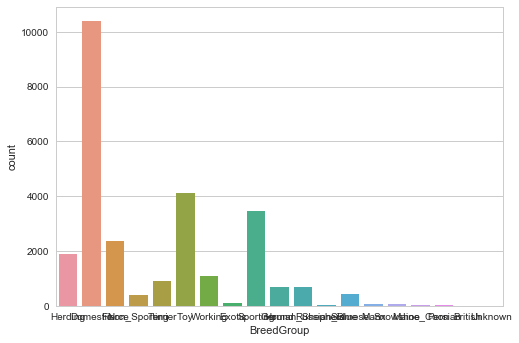

In [955]:
sns.countplot(data =train, x='BreedGroup')


In [947]:

train[['Breed','OutcomeType','BreedGroup']].iloc[7000:8000]

,Breed,OutcomeType,BreedGroup
7000,Labrador Retriever Mix,Adoption,Sporting
7001,German Shepherd Mix,Adoption,German_Shepherd
7002,Domestic Shorthair Mix,Adoption,Domestic
7003,Domestic Shorthair Mix,Transfer,Domestic
7004,German Shepherd Mix,Transfer,German_Shepherd
7005,Domestic Shorthair Mix,Transfer,Domestic
7006,Domestic Longhair Mix,Return_to_owner,Domestic
7007,Domestic Shorthair Mix,Adoption,Domestic
7008,Labrador Retriever/Beagle,Adoption,Sporting
7009,Domestic Shorthair Mix,Adoption,Domestic
